In [1]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import text2emotion as te

[nltk_data] Downloading package stopwords to /Users/ashfi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ashfi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ashfi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from youtube_transcript_api import YouTubeTranscriptApi
video_id = 'S4lTtvlFvyk'
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [3]:
df = pd.DataFrame(transcript)

In [4]:
merged_str = df['text'].str.cat(sep=' ')
print(merged_str)

Point number one: When you hear someone longing
for the “good old days,” take it with a grain of salt. Take it with a grain of salt. We live in a great nation and we are rightly
proud of our history. We are beneficiaries of the labor and the
grit and the courage of generations who came before. But I guess it’s part of human nature, especially
in times of change and uncertainty, to want to look backwards and long for some imaginary
past when everything worked, and the economy hummed, and all politicians were wise, and
every child was well-mannered, and America pretty much did whatever it wanted around
the world. Guess what. It ain’t so. The “good old days” weren’t that good. Yes, there have been some stretches in our
history where the economy grew much faster, or when government ran more smoothly. There were moments when, immediately after
World War II, for example, or the end of the Cold War, when the world bent more easily
to our will. But those are sporadic, those moments, those
epis

In [7]:
import re
split_list = merged_str.split('.')
df = pd.DataFrame({'text': split_list})

In [8]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', output_hidden_states=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [9]:
corpus = df['text'].tolist()

encoded_corpus = [tokenizer.encode(text, add_special_tokens=True) for text in corpus]
max_len = max([len(text) for text in encoded_corpus])

padded_corpus = [np.pad(encoded_text, (0, max_len - len(encoded_text)), 'constant') for encoded_text in encoded_corpus]
padded_corpus = torch.tensor(padded_corpus)

/var/folders/2_/dkxg0fq56mv06fxh6723qjn00000gn/T/ipykernel_6521/1113232145.py:7: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525699189/work/torch/csrc/utils/tensor_new.cpp:233.)
  padded_corpus = torch.tensor(padded_corpus)


In [10]:
with torch.no_grad():
    outputs = model(padded_corpus)



In [11]:
from transformers import pipeline

SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [12]:
SentimentClassifier(["I hope we get all these concepts! Its killing the neurons of our brain",
                     "We had a nice experience in this trip",
                     "Houston we have a problem"
                      ])

[{'label': 'NEGATIVE', 'score': 0.9997034668922424},
 {'label': 'POSITIVE', 'score': 0.9998235106468201},
 {'label': 'NEGATIVE', 'score': 0.9944382905960083}]

In [13]:
def FunctionBERTSentiment(inpText):
    return(SentimentClassifier(inpText)[0]['label'])

FunctionBERTSentiment(inpText="Houston we are fucked")

'NEGATIVE'

In [14]:
df['Sentiment'] = df['text'].apply(FunctionBERTSentiment)
df.head(10)

,text,Sentiment
0,Point number one: When you hear someone longin...,POSITIVE
1,Take it with a grain of salt,POSITIVE
2,We live in a great nation and we are rightly\...,POSITIVE
3,We are beneficiaries of the labor and the\ngr...,POSITIVE
4,"But I guess it’s part of human nature, especi...",POSITIVE
5,Guess what,NEGATIVE
6,It ain’t so,NEGATIVE
7,The “good old days” weren’t that good,NEGATIVE
8,"Yes, there have been some stretches in our\nh...",NEGATIVE
9,"There were moments when, immediately after\nW...",POSITIVE


<Axes: >

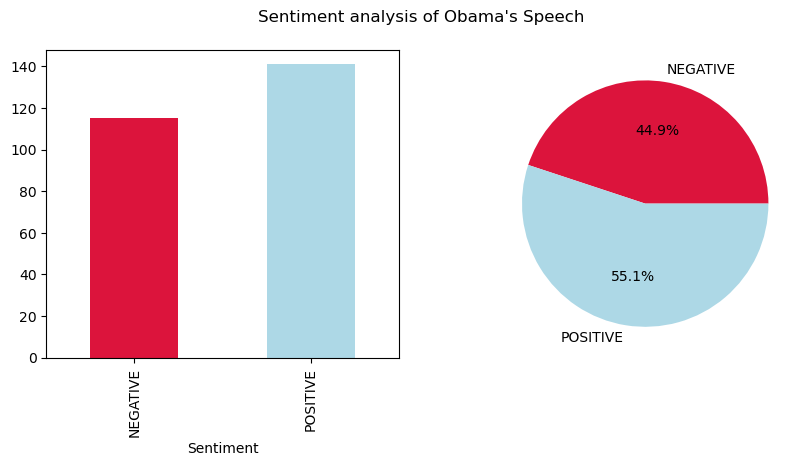

In [15]:
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Obama's Speech")
 
# Grouping the data
GroupedData=df.groupby('Sentiment').size()
 
# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue'], autopct='%1.1f%%')